In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from poola import core as pool
from scipy import stats
import matplotlib as mpl
import gpplot as gpp
import seaborn as sns
gpp.set_aesthetics()

pd.set_option('display.max_columns', None)

In [2]:
selfediting = pd.read_excel('../../../Github/required_data/TP53/Rebuttal_data.xlsx', sheet_name='Sanger_selfediting')

In [18]:
selfediting_long = pd.melt(
    selfediting,
    id_vars=['Edit', 'Name', 'Vector', 'Selection', 'sgRNA', 'ID', 'ID_2', 'Average'],
    value_vars=['Rep A', 'Rep B'],
    var_name='Replicate',
    value_name='Value')

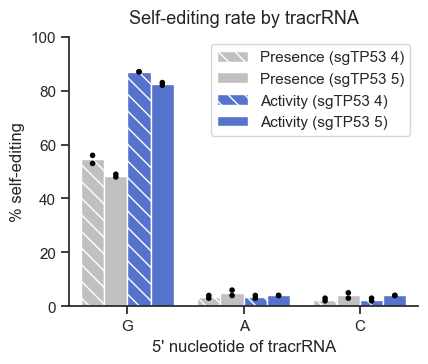

In [38]:
fig, ax = plt.subplots()

colors = {'Presence (sgTP53 4)':'silver','Presence (sgTP53 5)':'silver', "Activity (sgTP53 4)": 'royalblue', "Activity (sgTP53 5)": 'royalblue'}

ax = sns.barplot(data=selfediting, x="Name", y="Average", hue='ID_2', palette=colors)
ax.set_ylim(0, 100)
fig.set_size_inches(4.5, 3.5)
ax.set_ylabel("% self-editing")
ax.set_xlabel("5' nucleotide of tracrRNA")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.55, 0.93), ncol=3, title=None, frameon=False,
)
ax.set_title("Self-editing rate by tracrRNA", y=1.02, fontsize=13)
sns.despine()

hatches = ["\\\\", "", "\\\\", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
ax.legend(title='')

sns.stripplot(
    data=selfediting_long,
    x="Name", y="Value", hue="ID_2",
    dodge=True, jitter=False, ax=ax,
    marker='o', edgecolor='black', linewidth=2,
    palette=colors, size=2, legend=False)

In [27]:
on_target = pd.read_excel('../../../Github/required_data/TP53/Rebuttal_data.xlsx', sheet_name='Illumina_on_target')

In [28]:
on_target

,ID,Condition,Name,Rep A,Rep B,Average,ID_2
0,654_d26,Presence,G,72.60,71.20,71.90,Presence (sgTP53 4)
1,655_d26,Presence,G,67.40,68.60,68.00,Presence (sgTP53 5)
2,648_d26,Activity,G,96.00,96.10,96.05,Activity (sgTP53 4)
3,649_d26,Activity,G,96.70,96.40,96.55,Activity (sgTP53 5)
4,656_d26,Presence,A,0.01,0.01,0.01,Presence (sgTP53 4)
5,657_d26,Presence,A,0.00,0.00,0.00,Presence (sgTP53 5)
6,650_d26,Activity,A,0.01,0.01,0.01,Activity (sgTP53 4)
7,651_d26,Activity,A,0.00,0.00,0.00,Activity (sgTP53 5)
8,658_d26,Presence,C,0.01,0.01,0.01,Presence (sgTP53 4)
9,659_d26,Presence,C,0.00,0.00,0.00,Presence (sgTP53 5)


In [29]:
on_target_long = pd.melt(
    on_target,
    id_vars=['Name', 'Condition', 'ID', 'ID_2', 'Average'],
    value_vars=['Rep A', 'Rep B'],
    var_name='Replicate',
    value_name='Value')

<Axes: title={'center': 'On-target editing rate by tracrRNA'}, xlabel="5' nucleotide of tracrRNA", ylabel='A>G editing efficiency'>

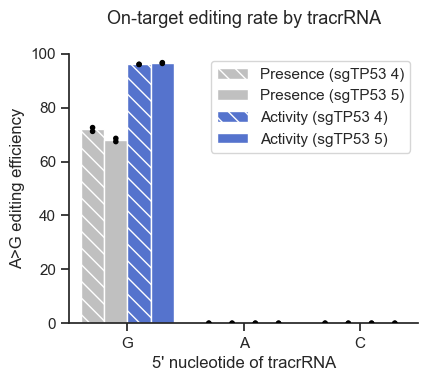

In [39]:
fig, ax = plt.subplots()

colors = {'Presence (sgTP53 4)':'silver','Presence (sgTP53 5)':'silver', "Activity (sgTP53 4)": 'royalblue', "Activity (sgTP53 5)": 'royalblue'}

ax = sns.barplot(data=on_target, x="Name", y="Average", hue='ID_2', palette=colors)
ax.set_ylim(0,100)

fig.set_size_inches(4.5, 3.5)
ax.set_ylabel("A>G editing efficiency")
ax.set_xlabel("5' nucleotide of tracrRNA")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.55, 0.97
                   ), ncol=3, title=None, frameon=False,
)
ax.set_title("On-target editing rate by tracrRNA", y=1.08, fontsize=13)
sns.despine()

hatches = ["\\\\", "", "\\\\", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
ax.legend(title='')

sns.stripplot(
    data=on_target_long,
    x="Name", y="Value", hue="ID_2",
    dodge=True, jitter=False, ax=ax,
    marker='o', edgecolor='black', linewidth=2,
    palette=colors, size=2, legend=False)